In [2]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Milindh R
[nltk_data]     Kashyap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Milindh R
[nltk_data]     Kashyap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
puritanDf = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B00K8K937IPuritan'sPrideSuperStrengthRapidReleaseCapsulesMelatonin.csv")

FileNotFoundError: [Errno 2] No such file or directory: "D:\\Documents\\Prof_Docs\\Milindh\\DS Assignment\\B00K8K937IPuritan'sPrideSuperStrengthRapidReleaseCapsulesMelatonin.csv"

In [ ]:
carlyleDf = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv")

In [7]:
quilpureDf = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv")

In [8]:
vitafusionDf = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv")

In [9]:
vitamaticDf =  pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv")

In [10]:
natrolDf = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B079TD7HG2_NatrolMelatoninSleepAidGummy.csv")

In [11]:
carlyleDf2 = pd.read_csv("D:\Documents\Prof_Docs\Milindh\DS Assignment\B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv")

In [12]:
puritanDf.shape

(3200, 22)

In [13]:
carlyleDf.shape

(5000, 22)

In [14]:
quilpureDf.shape

(1300, 22)

In [15]:
vitafusionDf.shape

(1950, 22)

In [16]:
vitamaticDf.shape

(1000, 22)

In [17]:
natrolDf.shape

(2700, 22)

In [18]:
carlyleDf2.shape

(760, 22)

In [19]:
#As all these DataFrames have the same number of columns, We will connect the dataframes vertically

melatoninDf = pd.concat([puritanDf,carlyleDf, quilpureDf, vitafusionDf, vitamaticDf, natrolDf, carlyleDf2], ignore_index = True)

In [20]:
melatoninDf.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [21]:
melatoninDf.tail()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
15905,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They taste and work great!!!! Fall asleep pret...,NaN,They work Great!!!!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W
15906,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They weren’t the best tasting. But they worked...,NaN,Tastes gross,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W
15907,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,I usually buy the Puritans Pride 10mg capsules...,NaN,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R31...,B08451719W
15908,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Sharper Shopper,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Works like a charm. Great sleep!!!,NaN,Works like a charm,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R6D...,B08451719W
15909,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,JW,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,"The flavor is great, you could chew it if you ...",NaN,This works to relax you and to help you sleep.,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RSA...,B08451719W


In [22]:
def extract_dose(product_title):
    match = re.search(r'(\d+\s?mg)', product_title, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

In [23]:
melatoninDf['dose']= melatoninDf['product_title'].apply(extract_dose)

In [24]:
melatoninDf

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,None
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,None
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,None
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,None
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,NaN,Verified Purchase,NaN,NaN,NaN,...,They taste and work great!!!! Fall asleep pret...,NaN,They work Great!!!!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W,12 mg
15906,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,NaN,Verified Purchase,NaN,NaN,NaN,...,They weren’t the best tasting. But they worked...,NaN,Tastes gross,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W,12 mg
15907,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,NaN,Verified Purchase,NaN,NaN,NaN,...,I usually buy the Puritans Pride 10mg capsules...,NaN,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R31...,B08451719W,12 mg
15908,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Sharper Shopper,NaN,Verified Purchase,NaN,NaN,NaN,...,Works like a charm. Great sleep!!!,NaN,Works like a charm,Na

In [35]:
melatoninDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   asin                            15910 non-null  object 
 1   product_title                   15910 non-null  object 
 2   average_rating                  15910 non-null  float64
 3   total_reviews                   15910 non-null  int64  
 4   review_author                   15910 non-null  object 
 5   author_badge                    102 non-null    object 
 6   badge                           15601 non-null  object 
 7   reviewed_product_attribute      13815 non-null  object 
 8   reviewed_variant_asin           13815 non-null  object 
 9   variant_review_url              13815 non-null  object 
 10  review_rating                   15910 non-null  int64  
 11  review_date                     15910 non-null  object 
 12  reviewed_country                

C:\Users\shrey\AppData\Local\Temp\ipykernel_29376\4260238658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melatoninDf['sentiment'] = melatoninDf['review_rating'].apply(categorize_sentiment)


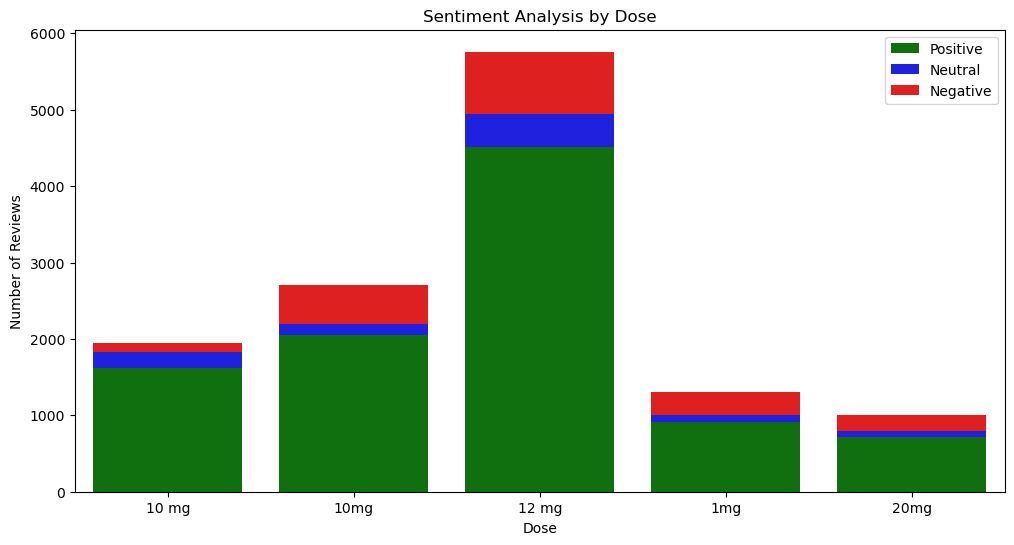

In [57]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to your dataframe
melatoninDf['sentiment'] = melatoninDf['review_rating'].apply(categorize_sentiment)

# Grouping by dose and sentiment
sentiment_counts = melatoninDf.groupby(['dose', 'sentiment']).size().unstack().fillna(0)

# Plotting the sentiment distribution for each dose
plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.Positive, color='green', label='Positive')
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.Neutral, bottom=sentiment_counts.Positive, color='blue', label='Neutral')
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.Negative, bottom=sentiment_counts.Positive + sentiment_counts.Neutral, color='red', label='Negative')

plt.title('Sentiment Analysis by Dose')
plt.xlabel('Dose')
plt.ylabel('Number of Reviews')
plt.xticks()
plt.legend()
plt.show()

In [42]:
melatoninDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          15910 non-null  object 
 1   product_title                 15910 non-null  object 
 2   average_rating                15910 non-null  float64
 3   total_reviews                 15910 non-null  int64  
 4   review_author                 15910 non-null  object 
 5   author_badge                  102 non-null    object 
 6   badge                         15601 non-null  object 
 7   reviewed_product_attribute    13815 non-null  object 
 8   reviewed_variant_asin         13815 non-null  object 
 9   variant_review_url            13815 non-null  object 
 10  review_rating                 15910 non-null  int64  
 11  review_date                   15910 non-null  object 
 12  reviewed_country              15910 non-null  object 
 13  r

In [50]:
reqired_columns = ['product_title', 'review_rating', 'review_text','dose', 'sentiment', ]

In [52]:
melatoninDf = melatoninDf[reqired_columns]

In [60]:
melatoninDf.tail()

,product_title,review_rating,review_text,dose,sentiment
15905,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,They taste and work great!!!! Fall asleep pret...,12 mg,Neutral
15906,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,They weren’t the best tasting. But they worked...,12 mg,Neutral
15907,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,2,I usually buy the Puritans Pride 10mg capsules...,12 mg,Negative
15908,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,5,Works like a charm. Great sleep!!!,12 mg,Positive
15909,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,5,"The flavor is great, you could chew it if you ...",12 mg,Positive


In [86]:

melatoninDf = melatoninDf.dropna(subset=['review_text'])

In [87]:
melatoninDf

,product_title,review_rating,review_text,dose,sentiment
0,Puritan's Pride Super Strength Rapid Release C...,4,"works great , think gel capsule dissolves much...",None,Positive
1,Puritan's Pride Super Strength Rapid Release C...,4,Powerful ! knock right !,None,Positive
2,Puritan's Pride Super Strength Rapid Release C...,5,"Best melatonin 've tried , much better",None,Positive
3,Puritan's Pride Super Strength Rapid Release C...,5,"Works like charm , great price .",None,Positive
4,Puritan's Pride Super Strength Rapid Release C...,5,"love product , use sleep night , every time ta...",None,Positive
...,...,...,...,...,...
15905,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,taste work great ! ! ! ! Fall asleep pretty qu...,12 mg,Neutral
15906,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,’ best tasting . worked kind .,12 mg,Neutral
15907,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,2,usually buy Puritans Pride 10mg capsules 12mg ...,12 mg,Negative
15908,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,5,Works like charm . Great sleep ! ! !,12 mg,Positive


In [94]:
def remove_specific_words(text, words_to_remove):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in words_to_remove]
    return ' '.join(filtered_tokens)

# Specify words to remove
words_to_remove = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
    'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
    "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't"
}

# Apply the function to the 'TextColumn'
melatoninDf['review_text'] = melatoninDf['review_text'].apply(remove_specific_words, words_to_remove=words_to_remove)



In [97]:
melatoninDf

,product_title,review_rating,review_text,dose,sentiment
0,Puritan's Pride Super Strength Rapid Release C...,4,"works great , think gel capsule dissolves much...",None,Positive
1,Puritan's Pride Super Strength Rapid Release C...,4,Powerful ! knock right !,None,Positive
2,Puritan's Pride Super Strength Rapid Release C...,5,"Best melatonin 've tried , much better",None,Positive
3,Puritan's Pride Super Strength Rapid Release C...,5,"Works like charm , great price .",None,Positive
4,Puritan's Pride Super Strength Rapid Release C...,5,"love product , use sleep night , every time ta...",None,Positive
...,...,...,...,...,...
15905,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,taste work great ! ! ! ! Fall asleep pretty qu...,12 mg,Neutral
15906,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,’ best tasting . worked kind .,12 mg,Neutral
15907,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,2,usually buy Puritans Pride 10mg capsules 12mg ...,12 mg,Negative
15908,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,5,Works like charm . Great sleep ! ! !,12 mg,Positive


In [100]:
selected_words = ['good sleep', 'dissolve', 'tasty', 'helpful', 'no help', 'best', 'worst', 'powerful', 'works', 'great', 'bad', 'love', 'must', 'mus']

# Tokenize the text and select specific words
melatoninDf['selected_words'] = melatoninDf['review_text'].apply(lambda text: [word for word in word_tokenize(text) if word.lower() in selected_words])

# Display the DataFrame
melatoninDf

,product_title,review_rating,review_text,dose,sentiment,selected_words
0,Puritan's Pride Super Strength Rapid Release C...,4,"works great , think gel capsule dissolves much...",None,Positive,"[works, great]"
1,Puritan's Pride Super Strength Rapid Release C...,4,Powerful ! knock right !,None,Positive,[Powerful]
2,Puritan's Pride Super Strength Rapid Release C...,5,"Best melatonin 've tried , much better",None,Positive,[Best]
3,Puritan's Pride Super Strength Rapid Release C...,5,"Works like charm , great price .",None,Positive,"[Works, great]"
4,Puritan's Pride Super Strength Rapid Release C...,5,"love product , use sleep night , every time ta...",None,Positive,"[love, helpful]"
...,...,...,...,...,...,...
15905,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,taste work great ! ! ! ! Fall asleep pretty qu...,12 mg,Neutral,[great]
15906,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,3,’ best tasting . worked kind .,12 mg,Neutral,[best]
15907,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,2,usually buy Puritans Pride 10mg capsules 12mg ...,12 mg,Negative,[]
15908,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,5,Works like charm . Great sleep ! ! !,12 mg,Positive,"[Works, Great]"
